In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib

from range_construction import range_percent_by_actions, hand_combos_multiplier, generate_range

$\textbf{Motivation}$: Throughout the tournament we've seen a consistent covergence to 3-4 handed play with an average stack depth of 20BB (with SD of ~10BB) no matter the lead held until this point. We've also been in the position of "big stack" at this convergence point, but more frequently than not,  have not won the table. Either our short-stack play is poor or the small sample size and variance has limited our EV realization. 

Given that we MUST secure 1st place finishes next match, I propose a strategy to eliminate unnecessary variance and secure at least a 2nd place finish. The goal is to reach heads-up play with at least an equal amount of chips compared to the opponent. 

$\textbf{Strategy}:$ When facing a shove from opponents, call with an extremely tight range: [AKs, AKo, KK, AA]. Our opponents are mainly shoving with [Pairs,A-high,K-high+] and even if they are shoving with worse, there is little reason to risk our chance of winning based on a 60-40 advantage. Thus, our calling range will typically dominate the opponent leading to a range versus range equity of 0.74. 

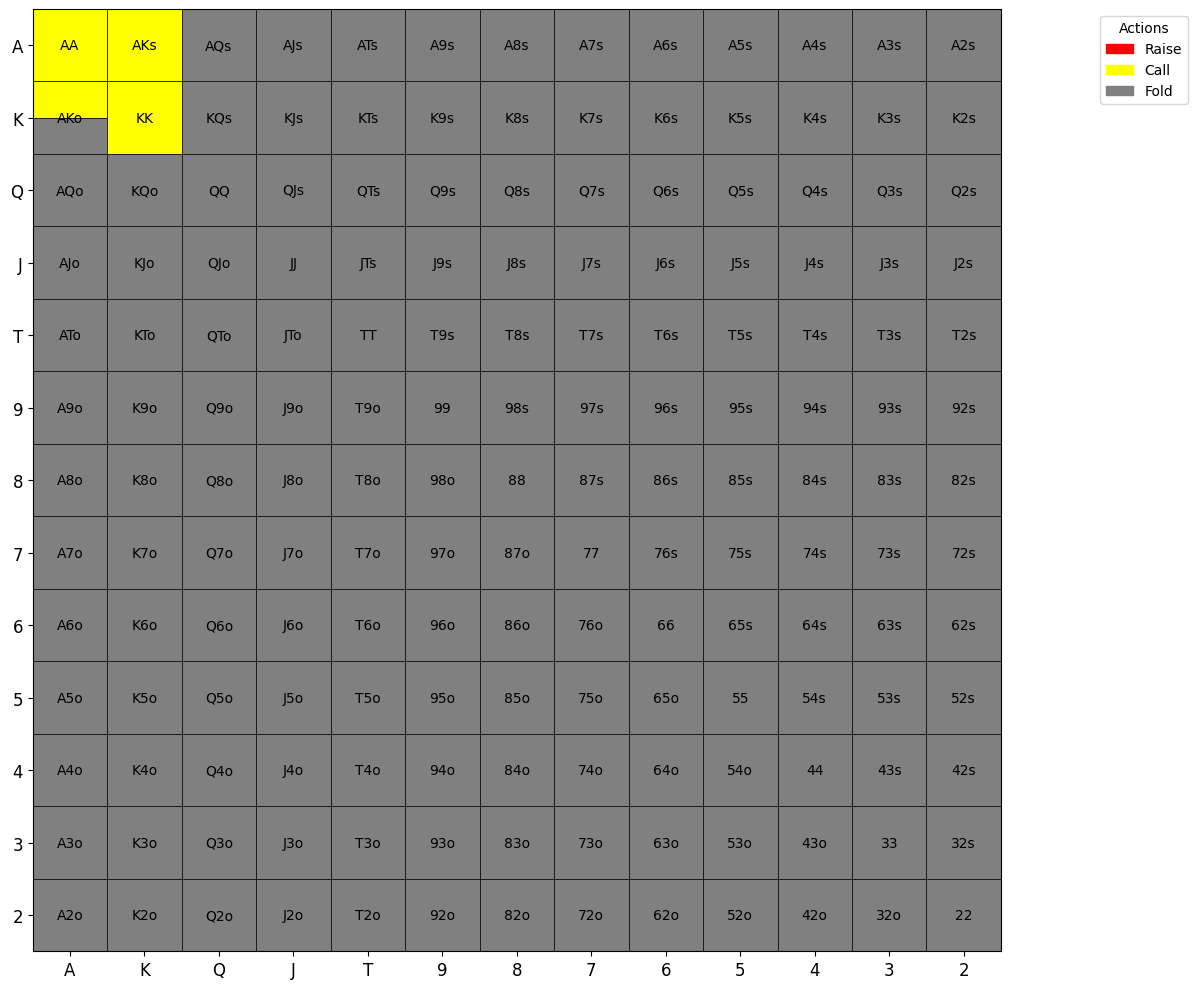

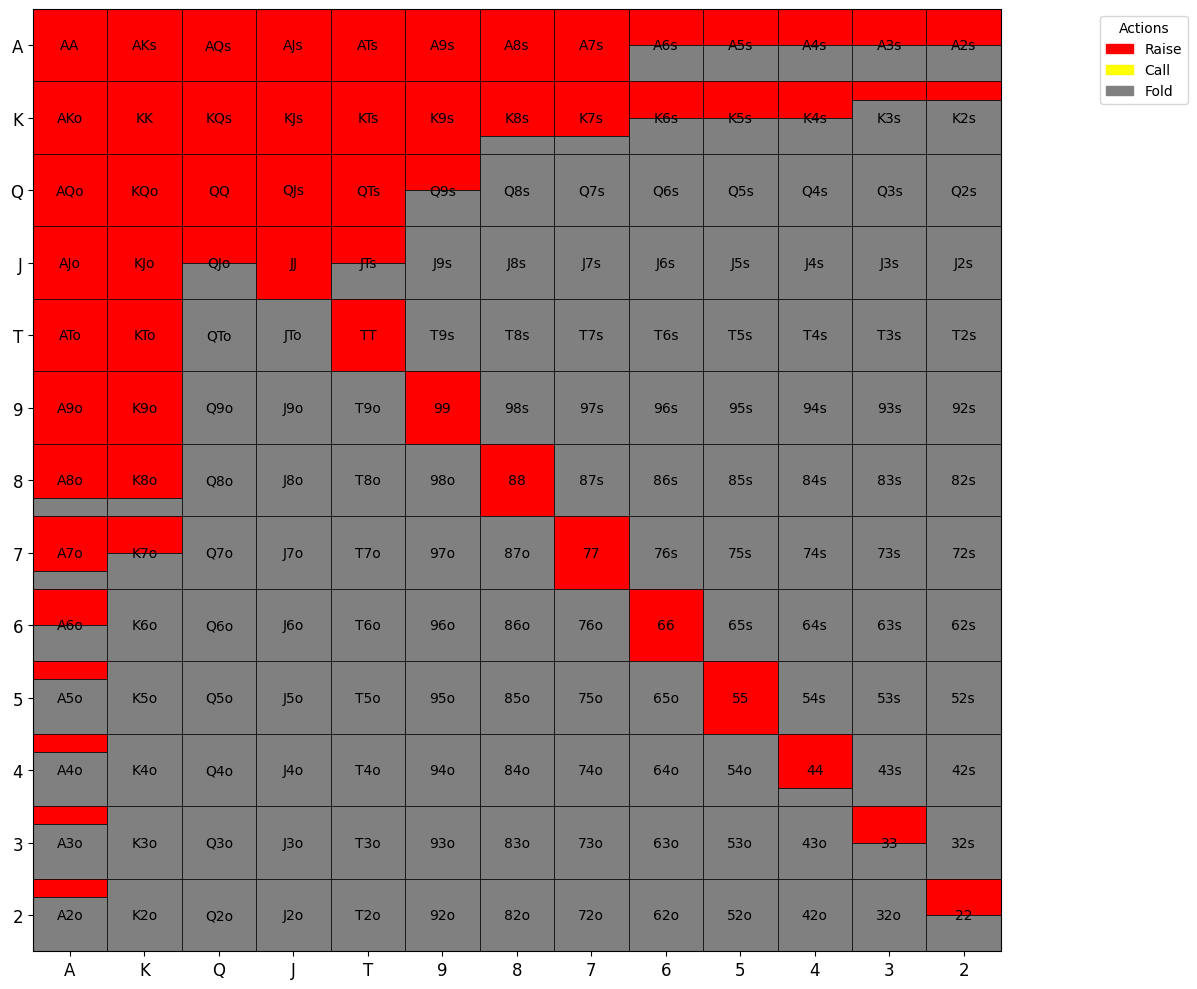

Hero calling range equity: 0.7458010661287999


In [71]:
def calling_range_equity(preflop_equity, hero_range, villain_range):
    # double-weighted average: calc equity between both hands*proportion of calling_range*proportion of opponent range
    hero_equity = 0.0

    hero_total_combos = range_percent_by_actions(hero_range, 'call')[1]
    villain_total_combos = range_percent_by_actions(villain_range, 'raise')[1]

    for hhand in hero_range: 
        for vhand in villain_range:
                if hhand == vhand: 
                    hero_equity += 0.5*(hand_combos_multiplier(hhand)/hero_total_combos)*(hand_combos_multiplier(vhand)/villain_total_combos)
                else: 
                    equity_lookup = preflop_equity[((preflop_equity['hand1_str'] == hhand) & (preflop_equity['hand2_str'] == vhand)) | ((preflop_equity['hand1_str'] == vhand) & (preflop_equity['hand2_str'] == hhand))]   
                    equity = equity_lookup['equity_hand1'].values[0]
                    if equity_lookup['hand2_str'].values[0] == hhand: 
                        equity = 1 - equity
                        
                    hero_equity += equity * (hand_combos_multiplier(hhand)/hero_total_combos) * (hand_combos_multiplier(vhand)/villain_total_combos) * hero_calling_range[hhand]['call'] * villain_shove_range[vhand]['raise']   
    return hero_equity


data = pd.read_csv('../results/preflop_matchups.csv')
hero_calling_range = {
    # Pairs
    "AA": {"raise": 0.0, "call": 1.0},
    "KK": {"raise": 0.0, "call": 1.0},
    "AKo": {"raise": 0.0, "call": 0.5},
    "AKs": {"raise": 0.0, "call": 1.0},
} 

villain_shove_range = {
    # Pairs
    "AA": {"raise": 1.0, "call": 0.0},
    "KK": {"raise": 1.0, "call": 0.0},
    "QQ": {"raise": 1.0, "call": 0.0},
    "JJ": {"raise": 1.0, "call": 0.0},
    "TT": {"raise": 1.0, "call": 0.0},
    "99": {"raise": 1.0, "call": 0.0},
    "77": {"raise": 1.0, "call": 0.0},
    "88": {"raise": 1.0, "call": 0.0},
    "66": {"raise": 1.0, "call": 0.0},
    "55": {"raise": 1.0, "call": 0.0},
    "44": {"raise": 0.75, "call": 0.0},
    "33": {"raise": 0.5, "call": 0.0},
    "22": {"raise": 0.5, "call": 0.0},

    "AKs": {"raise": 1.0, "call": 0.0},
    "AQs": {"raise": 1.0, "call": 0.0},
    "AJs": {"raise": 1.0, "call": 0.0},
    "ATs": {"raise": 1.0, "call": 0.0},
    "A9s": {"raise": 1.0, "call": 0.0},
    "A8s": {"raise": 1.0, "call": 0.0},
    "A7s": {"raise": 1.0, "call": 0.0},
    "A6s": {"raise": 0.5, "call": 0.0}, 
    "A5s": {"raise": 0.5, "call": 0.0},
    "A4s": {"raise": 0.5, "call": 0.0},
    "A3s": {"raise": 0.5, "call": 0.0},
    "A2s": {"raise": 0.5, "call": 0.0},

    "AKo": {"raise": 1.0, "call": 0.0},
    "AQo": {"raise": 1.0, "call": 0.0},
    "AJo": {"raise": 1.0, "call": 0.0},
    "ATo": {"raise": 1.0, "call": 0.0}, 
    "A9o": {"raise": 1.0, "call": 0.0},
    "A8o": {"raise": 0.75, "call": 0.0}, 
    "A7o": {"raise": 0.75, "call": 0.0}, 
    "A6o": {"raise": 0.5, "call": 0.0},
    "A5o": {"raise": 0.25, "call": 0.0},
    "A4o": {"raise": 0.25, "call": 0.0},
    "A3o": {"raise": 0.25, "call": 0.0},
    "A2o": {"raise": 0.25, "call": 0.0},

    "KQs": {"raise": 1.0, "call": 0.0},
    "KJs": {"raise": 1.0, "call": 0.0},
    "KTs": {"raise": 1.0, "call": 0.0},
    "K9s": {"raise": 1.0, "call": 0.0},
    "K8s": {"raise": 0.75, "call": 0.0},
    "K7s": {"raise": 0.75, "call": 0.0},
    "K6s": {"raise": 0.5, "call": 0.0},
    "K5s": {"raise": 0.5, "call": 0.0},
    "K4s": {"raise": 0.5, "call": 0.0},
    "K3s": {"raise": 0.25, "call": 0.0},
    "K2s": {"raise": 0.25, "call": 0.0},

    "KQo": {"raise": 1.0, "call": 0.0},
    "KJo": {"raise": 1.0, "call": 0.0}, 
    "KTo": {"raise": 1.0, "call": 0.0},
    "K9o": {"raise": 1.0, "call": 0.0},
    "K8o": {"raise": 0.75, "call": 0.0},
    "K7o": {"raise": 0.5, "call": 0.0},    

    "QJs": {"raise": 1.0, "call": 0.0},
    "QTs": {"raise": 1.0, "call": 0.0},
    "Q9s": {"raise": 0.5, "call": 0.0},
    "Q8s": {"raise": 0.0, "call": 0.0},
    
    "QJo": {"raise": 0.5, "call": 0.0},
    "QTo": {"raise": 0.0, "call": 0.0},
    "Q9o": {"raise": 0.0, "call": 0.0},

    "JTs": {"raise": 0.5, "call": 0.0},
    "J9s": {"raise": 0.0, "call": 0.0},
}
generate_range(hero_calling_range)
generate_range(villain_shove_range)

print(f'Hero calling range equity: {calling_range_equity(data, hero_calling_range, villain_shove_range)}')